In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import seaborn as sn
sn.set_context('notebook')

# Check 2017 HOBO data

Data from the Hobo pressure and temperature loggers have been downloaded for the period up to to April 2017 (see e-mail from Therese received 19/04/2017 at 11.11). The data are stored on the Hobo "shuttle" and can be extracted as follows:

 1. Connect the shuttle using the USB cable and start HOBOware Pro. <br><br>
 
 2. **Device > Manage shuttle**, then "offload" the series of interest. After offload is complete, the dialogue changes to allow the files to be saved in `.hobo` format. <br><br>
 
 3. **Tools > Bulk file export > Select files to export**. This converts the `.hobo` files to `.csv` format.
 
The code in this notebook reads the CSVs.

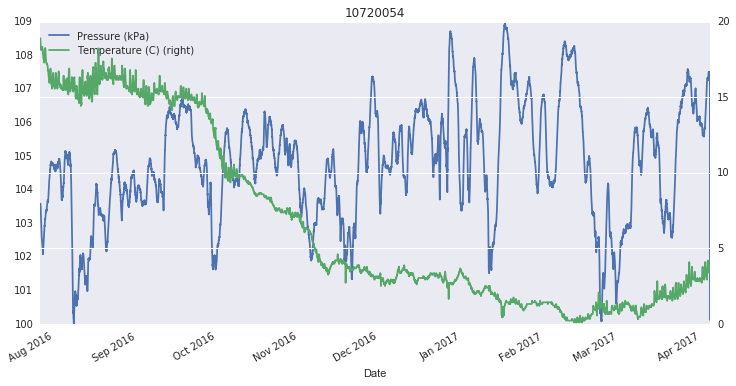

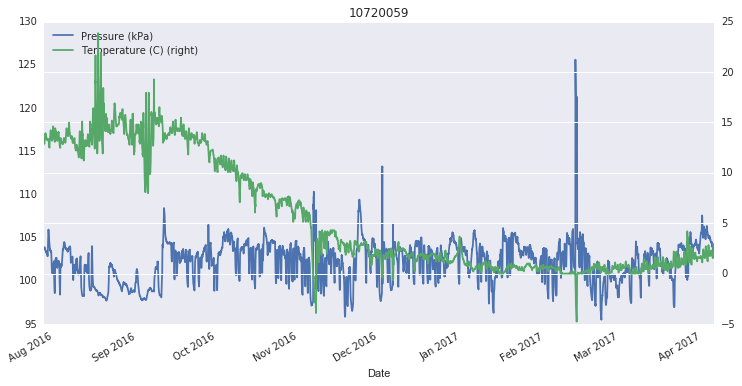

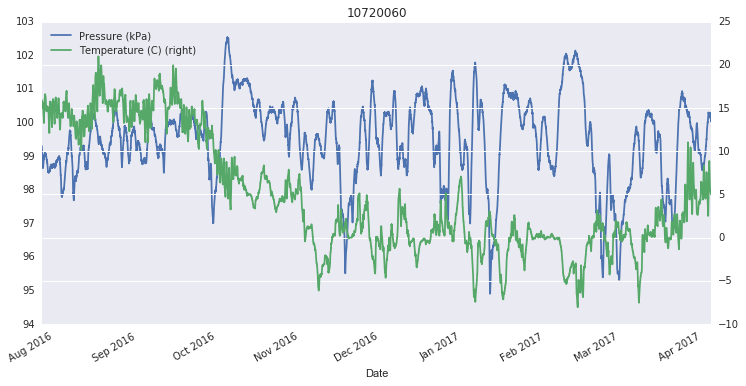

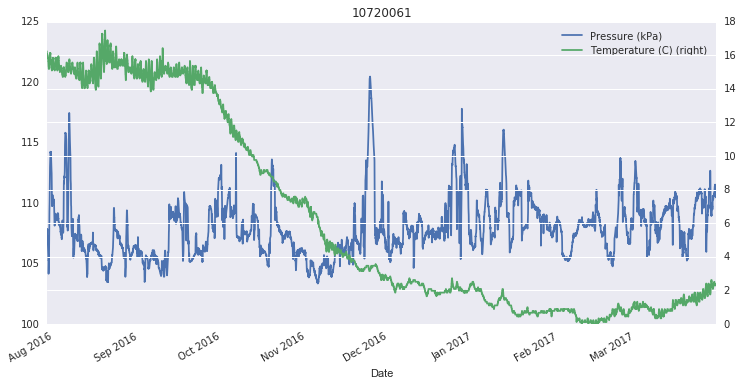

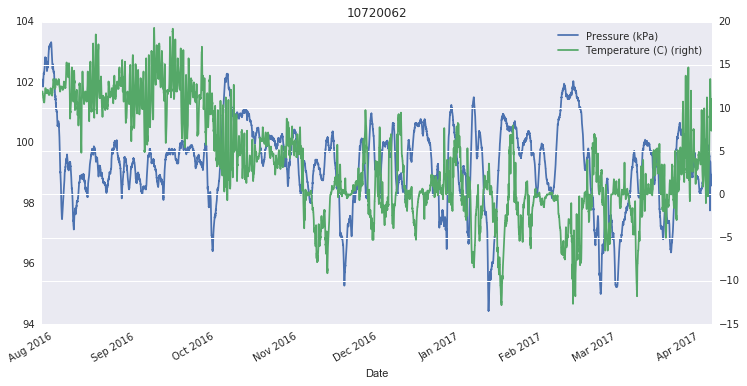

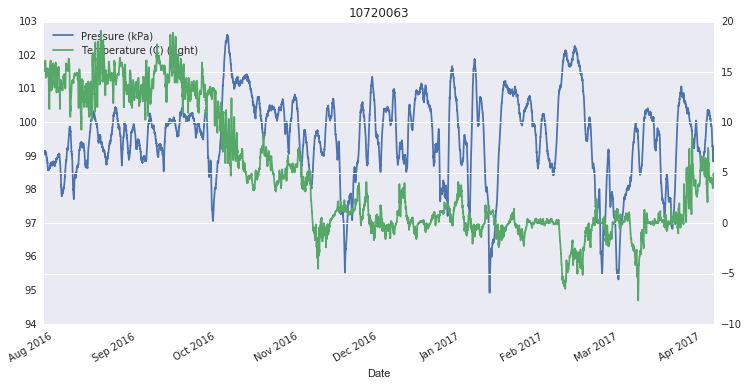

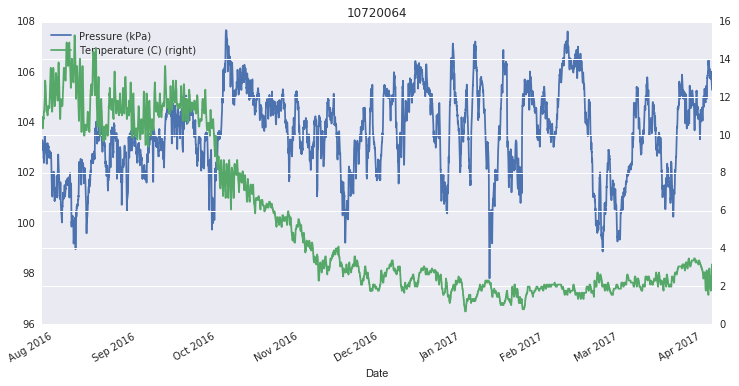

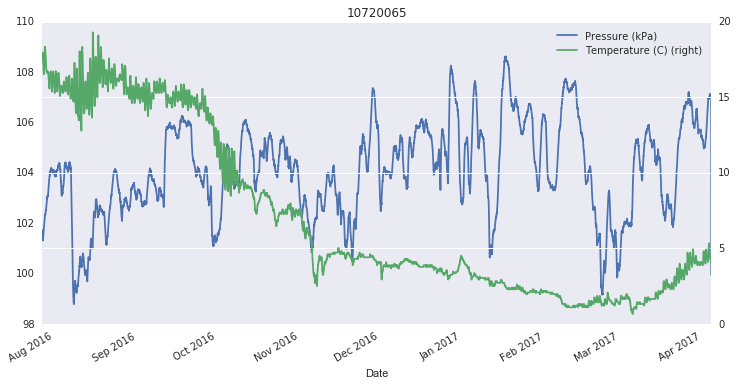

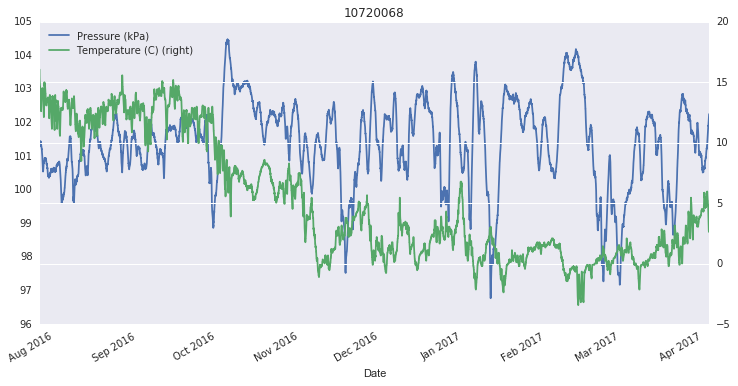

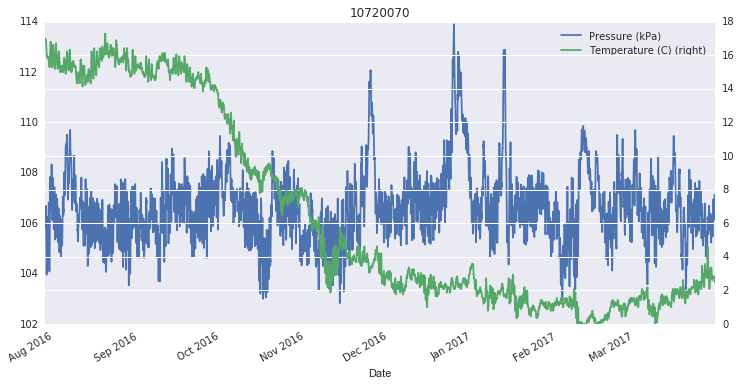

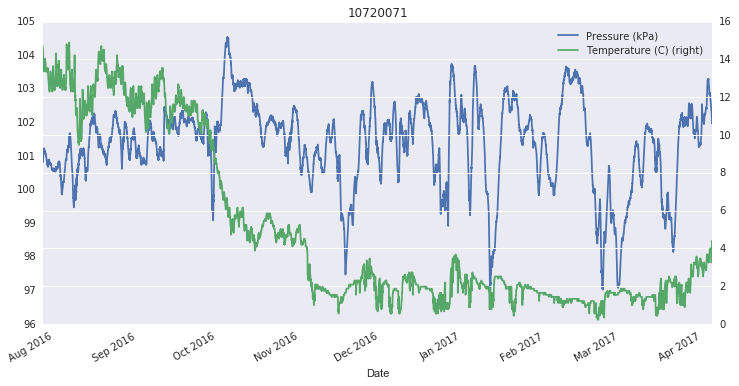

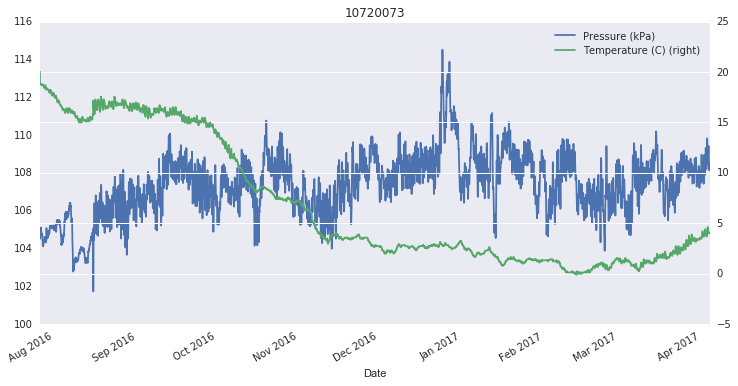

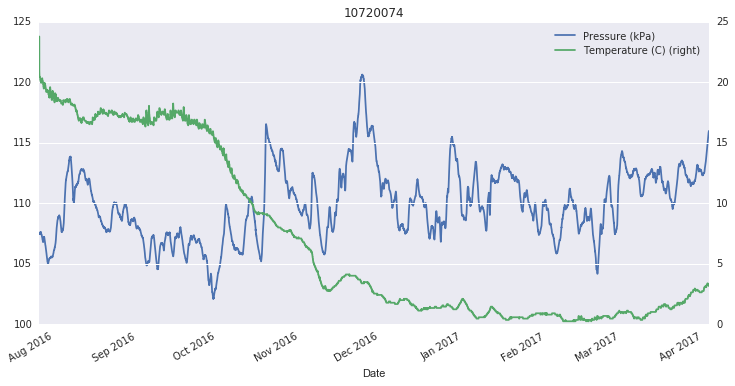

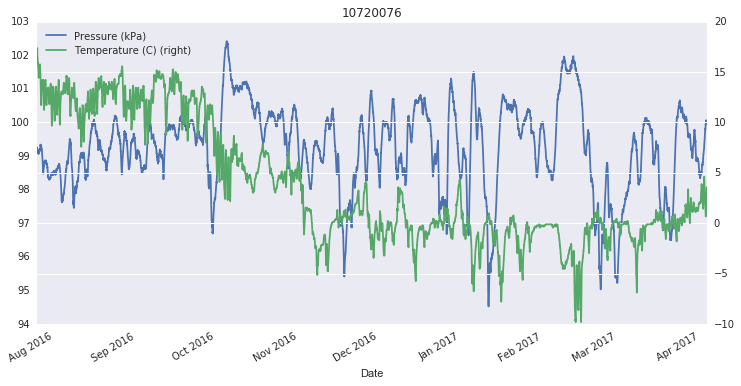

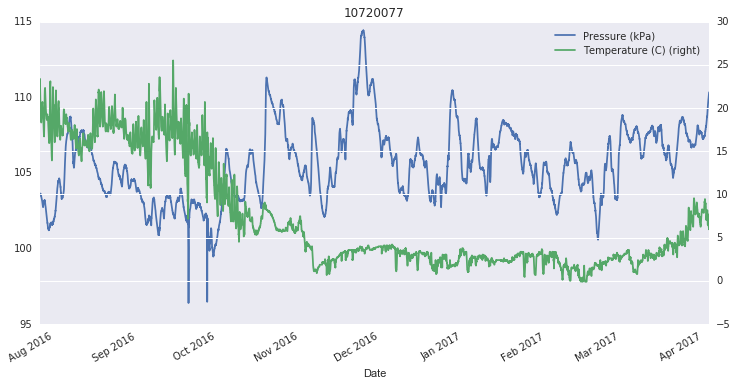

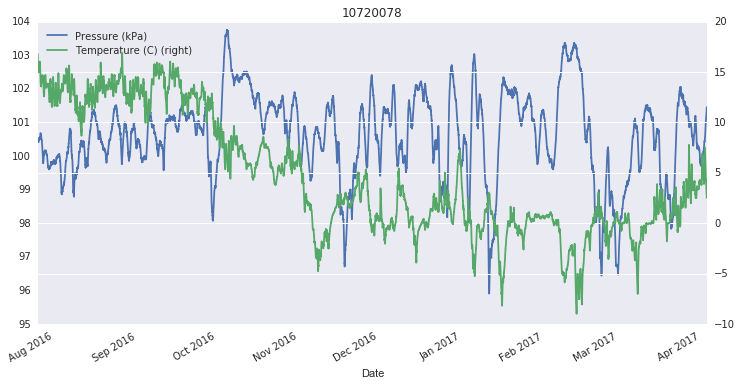

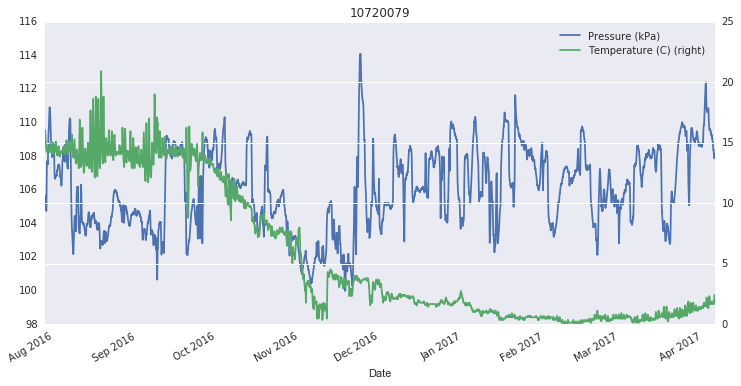

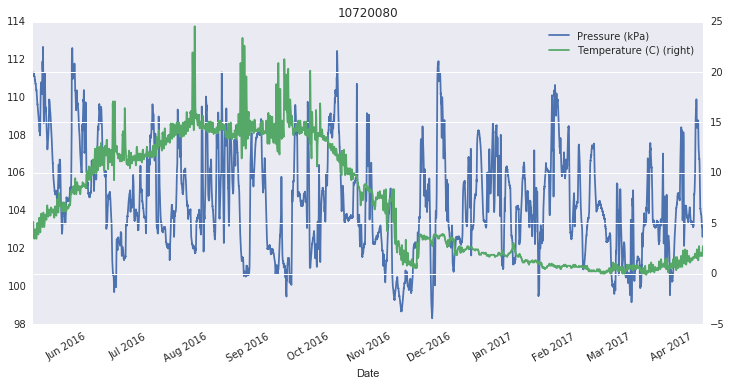

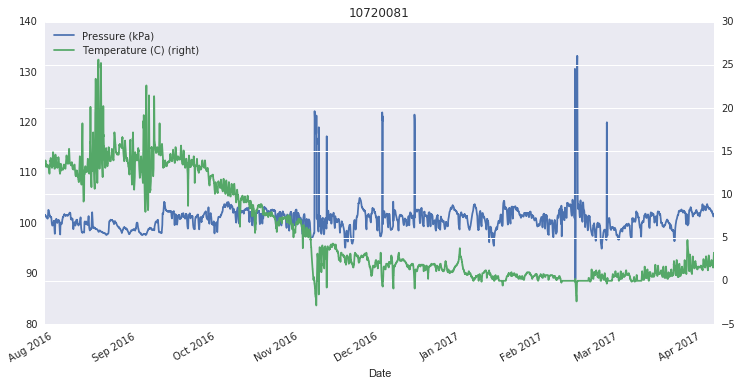

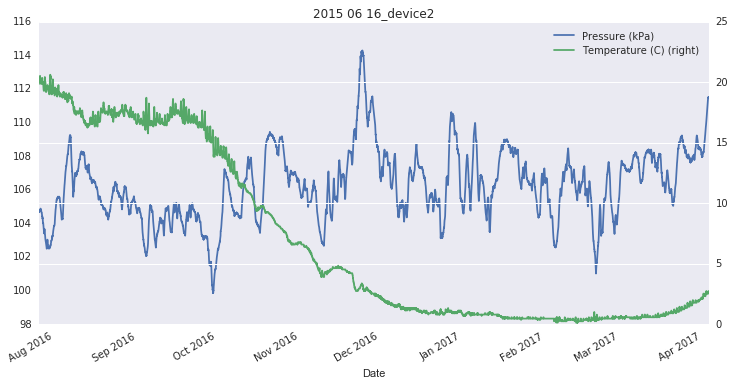

In [4]:
# Get list of files to process
csv_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data\Hobo_Data_2017\CSV'
search_path = os.path.join(csv_fold, '*.csv')
file_list = glob.glob(search_path)

# Loop over files
for idx, file_path in enumerate(file_list):
    # Get logger ID from file name
    name = os.path.split(file_path)[1][:-4]
    
    # Read data
    df = pd.read_csv(file_path, 
                     header=1,
                     usecols=[0, 1, 2, 3])
    
    # Tidy
    del df['#']
    df.columns = ['Date', 'Pressure (kPa)', 'Temperature (C)']
    
    # Convert dates
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set index
    df.index = df['Date']
    del df['Date']

    # Plot
    df.plot(secondary_y=['Temperature (C)'],
            figsize=(12, 6))
    plt.xlabel('')
    
    # Add logger ID
    plt.title(name)

## Summary

 * The temperature and pressure data look reasonable. <br><br>
 
 * It is not obvious which loggers are monitoring air pressure and which are water pressure, but presumably we can infer this from the series/logger IDs? For this reason, I have not yet calculated water depths. <br><br>
 
 * Two series/loggers (IDs 10720057 and 10720082) have no data at all and have not been plotted above. **Is this expected**?